In [1]:
import tensorflow as tf
import tensorflow.keras as k
import helper_functions as h
import numpy as np

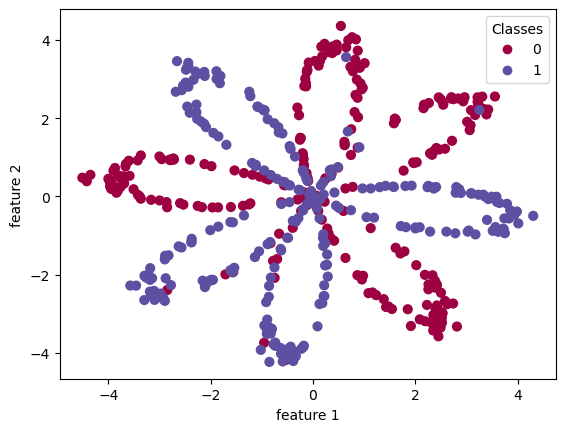

In [2]:
X_np, Y_np = h.load_flower_dataset(num_samples=500, petals=4, angle=30)
h.plot_scatter(X_np, Y_np)

In [3]:
X = tf.convert_to_tensor(X_np.T, dtype=tf.float32)    # (m,d)=(500,2)
Y = tf.convert_to_tensor(Y_np.T, dtype=tf.float32)    # (m,1)=(500,1)

# Theory Hidden Layer Neural Network

**Data used**:
       
<table style="width:50%">
  <tr>
    <td>m (# of samples)</td>
    <td> 500 </td> 
  </tr>
  <tr>
    <td>d (# of features)</td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td> shape of X </td>
    <td> (m,d)=(500, 2) </td> 
  </tr>
  <tr>
    <td>shape of Y </td>
    <td>(m,1)=(500, 1) </td> 
  </tr>
  
</table>

## Now
$ \boldsymbol{X} = \begin{bmatrix} \quad \boldsymbol x^1 \quad 
\\ \quad \boldsymbol{x}^2 \quad \\ \quad \vdots \quad \\ \quad \boldsymbol x^m \quad \end{bmatrix} $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 & f_2 & f_3 & \dots \quad f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,d)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,d)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(m,1)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} & \bold {w_2}  & \dots & \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} \vdots \\ \boldsymbol{\omega_1} & \boldsymbol{\omega_2} & \dots & \boldsymbol{\omega_{n_l}} \\ \vdots \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1},1)}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1},n_l)}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

build-in dense($A^{[l-1]}$)
<br>
$ \boldsymbol{Z^{[l]}/dense} = \boldsymbol{A^{[l-1]} W^{[l]}+b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(m,n_l)=(m,n_{l-1})\times(n_{l-1},n_l)} $
<br>
$ \boldsymbol Z^{[l]} = \begin{bmatrix} z^1 \\ z^2 & \boldsymbol{z^{[l]}_{2}} & \boldsymbol{z^{[l]}_{3}} & \dots & \boldsymbol{z^{[l]}_{n_l}} \\ \vdots \\ z^m \end{bmatrix} $

**Data**
<br>
$
\boldsymbol {X^{[0]}} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(m,n_x)=(m,d)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[2]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(m,n_y)=(m,1)} \color{default}
\\
\boldsymbol {W^{[1]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_x,n_h)=(d,n_h)} \color{default}
\\
\boldsymbol {W^{[2]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_h,n_y)=(n_h,1)} \color{default}
\\
\boldsymbol {b^{[1]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_h,)} \color{default}
\\
\boldsymbol {b^{[2]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_y,)} \color{default}
$

**Epoch**
<br>
$ \begin{rcases}
% \boldsymbol {Z^{[1]}} = \boldsymbol{W^{[1]}X} + \boldsymbol{b^{[1]}} 
% \qquad \qquad \qquad
% \color{purple}{shape: \qquad}\color{blue}{(n_h,m)=(n_h,d)\times(d,m)} \\
% or\\
\boldsymbol {Z^{[1]}} = \boldsymbol{A^{[0]}W^{[1]T}} + \boldsymbol{b^{[1]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(m,n_h)=(m,n_x)\times(n_x,n_h)} \\
\displaystyle 
\boldsymbol {A^{[1]}} = g^{[1]}(\boldsymbol {Z^{[1]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(m,n_h)} 
\\
\boldsymbol {Z^{[2]}} = \boldsymbol{A^{[1]}W^{[2]T}} + \boldsymbol{b^{[2]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(m,n_y)=(m,n_h)\times(n_h,n_y)} \\
\displaystyle 
\boldsymbol {A^{[2]}} = g^{[2]}(\boldsymbol {Z^{[2]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(m,n_y)}
\end{rcases} 
\color{green} \text{forward propagation} $
<br>
<br>
$ \displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold Y\ ln(\boldsymbol{A^{[2]}})+(1-\bold Y)\ ln(1-\boldsymbol{A^{[2]}})\} 
\qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{dZ^{[2]}} = \boldsymbol{A^{[2]}} - \bold{Y} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(m,n_y)} \\
\displaystyle 
\boldsymbol{dW^{[2]}}  = \frac{1}{m} \boldsymbol{A^{[1]}}^T \ \boldsymbol{dZ^{[2]}} \
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_h,n_y)=(n_h,m) \times (m,n_y)} \\
\displaystyle 
\boldsymbol{db^{[2]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[2]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,)} \qquad \qquad
\\
\\
\boldsymbol{dZ^{[1]}} = \boldsymbol{dZ^{[2]}} \boldsymbol{W^{[2]}} * g'^{[1]}(\boldsymbol{Z^{[1]}})
\qquad \color{purple}{shape: } \ \color{blue}{(m,n_h)=(m,n_y)\times(n_y,n_h) } \\
\displaystyle 
\boldsymbol{dW^{[1]}}  = \frac{1}{m} \boldsymbol{A^{[0]}}^T \ \boldsymbol{dZ^{[1]}} 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_x,n_h)=(n_x,m) \times (m,n_h)} \\
\displaystyle 
\boldsymbol{db^{[1]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[1]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_h,)} \qquad \qquad
\end{rcases}
\color{green} \text{gradient descent} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{W^{[1]}} = \boldsymbol{W^{[1]}}-\alpha \ \boldsymbol{dW^{[1]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_x,n_h)} \\
\boldsymbol{b^{[1]}} = \boldsymbol{b^{[1]}} - \alpha \ \boldsymbol{db^{[1]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,)} \\
\boldsymbol{W^{[2]}} = \boldsymbol{W^{[2]}}-\alpha \ \boldsymbol{dW^{[2]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,n_y)} \\
\boldsymbol{b^{[2]}} = \boldsymbol{b^{[2]}} - \alpha \ \boldsymbol{db^{[2]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,)} \qquad
\end{rcases}
\color{green} \text{Update Parameters after epoch} $

# keras high-level api

In [4]:
%reset_selective -f ^(?!X$|Y$|tf$|k$|h$|np$|X_np$|Y_np$).*

## layer_sizes
n_x = X.shape[-1] # size of input layer
n_h = 4        # size of hidden layer
n_y = Y.shape[-1] # size of output layer
## Initialize weights
np.random.seed(3)
init_W1 = (np.random.randn(n_h, n_x) * 0.01).astype(np.float32).T
init_W2 = (np.random.randn(n_y, n_h) * 0.01).astype(np.float32).T

# Create the model
model = k.models.Sequential()
model.add( k.layers.Dense(units=n_h, activation='tanh', input_shape=(n_x,),
                           kernel_initializer=tf.constant_initializer(init_W1),
                             bias_initializer="zeros") )
model.add( k.layers.Dense(units=n_y, activation='sigmoid', input_shape=(n_h,),
                           kernel_initializer=tf.constant_initializer(init_W2),
                             bias_initializer="zeros") )
model.summary()

# Compile the model
model.compile(
    optimizer=k.optimizers.SGD(learning_rate=0.5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[k.metrics.BinaryAccuracy()],
)

# Train the model
hist = model.fit(X, Y, epochs=10000, shuffle=False, batch_size=X.shape[0])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X, Y)
print('Test loss:', loss)
print('Test accuracy:', accuracy)
# hist.history["binary_accuracy"]
# hist.history["loss"]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 0.6932 - binary_accuracy: 0.4660
Epoch 2/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.6640
Epoch 3/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.4720
Epoch 4/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - binary_accuracy: 0.4460
Epoch 5/10000
1/1 [==============

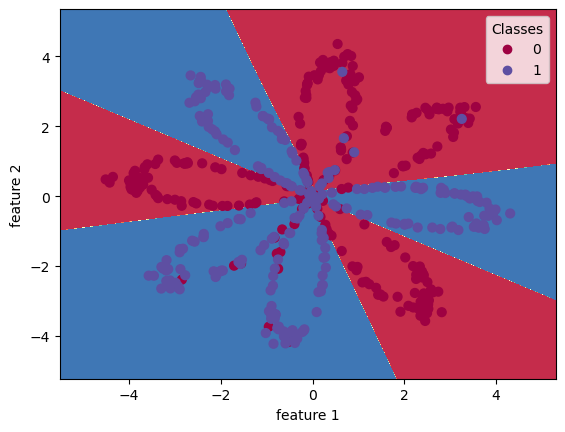

In [5]:
h.plot_1hidden_layer_nn_decision_boundary(model.weights[0].numpy().T, model.weights[1].numpy().reshape(-1,1), model.weights[2].numpy().T, 
    model.weights[3].numpy().reshape(-1,1), X_np, Y_np)